# Ordinary differential Equations

Yves HERI KIMBELE

___

Comparison of the scipy function ODEINT and the RK4 for the solution of a second order ODE.

___

We ask to solve the following differential equation

\begin{equation}
y''+5y'-6y=0
\end{equation}

This equation is a linear homogeneous differential equation of the second order with constant coefficient. To solve it, we need to pass by the characteristic equation which is given by

\begin{equation}
\lambda^2 +5 \lambda -6=0
\end{equation}

The goal is now to find the roots of this quadratic equation, so the first step is to find the discriminant of this equation

\begin{equation}
\Delta = 5^2+4\times 6 = 49
\end{equation}

as this discriminant is positive, so the characteristic polynomial has two distinct roots $\lambda_1$ and $\lambda_2$ and the solution of differential equation will be in general form below

\begin{equation}
y_h=c_1 e^{\lambda_1x}+c_2 e^{\lambda_2x}
\end{equation}

And back to our case we find 

\begin{equation}
\begin{cases}
\lambda_1 = \frac{-5-7}{2}=-6\\
\lambda_2 = \frac{-5+7}{2}=1
\end{cases}
\end{equation}

So the general solution of the differential equation is 

\begin{equation}
\label{Eqh}
y_h=c_1 e^{-6x}+c_2 e^{x}
\end{equation}

To find the constants $c_1$ and $c_2$, we have to look to the initial conditions given by

\begin{equation}
y(0)=2 \;\;and\;\;
y'(0)=3
\end{equation}

Knowing the general homogeneous solution $y_h$ we can find 

\begin{equation}
y'_h=-6c_1 e^{-6x}+c_2 e^{x}
\end{equation}

Putting $x=0$ in the expression of $y_h$ and $y'_h$, then the initial conditions lead to

\begin{equation}
\begin{cases}
c_1 +c_2 = 2\\
-6c_1+c_2 =3
\end{cases}
\end{equation}

By solving this system of equations we find $c_1 =-\frac{1}{7}$ and $c_2 =\frac{15}{7}$
Therefore the final solution of the differential equation is 

\begin{equation}
y_h=-\frac{1}{7}e^{-6x}+\frac{15}{7}e^{x}
\end{equation}

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

The differential equation has been transformed in a system of two differential equation of first order


\begin{equation}
\begin{cases}
z_1'=-5z_1+6z_0\\
z_0'=z_1
\end{cases}
\end{equation}


In [2]:
#Definition of the function

def fc(z,x):
    dz1=-5*z[1]+6*z[0]
    dz0=z[1]
    dz=np.array([dz0,dz1])
    return dz

#Initial conditions and parameters 

z0=[2,3]
a=0
b=1
N=1000
x=np.linspace(a,b,N)


Here we present the code for the Runge-Kutta Method

In [3]:
def RK4OdeSys(f,c,x):
    Z=np.zeros([len(x),len(c)])
    Z[0]=c
#    
    H=x[1]-x[0]
    for i in range(len(x)-1):
        k1 =  f(Z[i], x[i])    
        k2 =  f(Z[i]+H*k1/2, x[i] + H/2)
        k3 =  f(Z[i]+H*k2/2, x[i] + H/2)
        k4 =  f(Z[i]+H*k3, x[i] + H)
        Z[i+1] = Z[i]+(H/6) * (k1 + 2*(k2 + k3 ) + k4)
    return Z

Then the solutions

In [4]:
#The solver functions

yh=-(1/7)*np.exp(-6*x)+(15/7)*np.exp(x) #The exact solution
z=odeint(fc,z0,x) # With odeint
ZK=RK4OdeSys(fc,z0,x) 

The plot

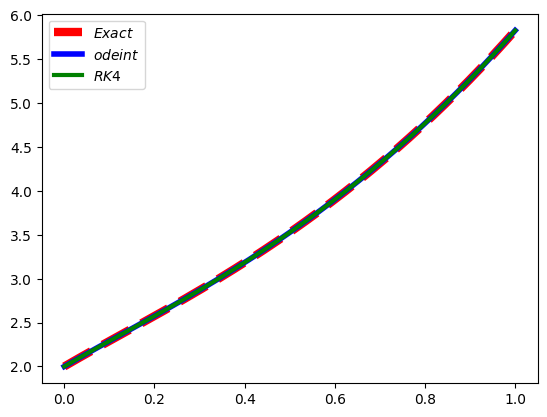

In [5]:
plt.plot(x,yh,'r--',label=r'$Exact$',linewidth=6)
plt.plot(x,z[:,0],'b-',label=r'$odeint$',linewidth=4)
plt.plot(x,ZK[:,0],'g-',label=r'$RK4$',linewidth=3)
plt.legend();